# Chap.14 教師なし学習1：次元の削減

## 14.1 次元の削減の概要

## 14.2 データの前処理

In [2]:
# 14-1 Boston.csvを読み込む
import pandas as pd

df = pd.read_csv('../support/datafiles/Boston.csv')
print(df.shape)
print(df.head())

(100, 14)
      CRIME    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD  TAX  \
0      high   0.0  18.10     0  0.718  3.561  87.9  1.6132  24.0  666   
1       low   0.0   8.14     0  0.538  5.950  82.0  3.9900   4.0  307   
2  very_low  82.5   2.03     0  0.415  6.162  38.4  6.2700   2.0  348   
3       low   0.0  21.89     0  0.624  6.151  97.9  1.6687   4.0  437   
4      high   0.0  18.10     0  0.614  6.980  67.6  2.5329  24.0  666   

   PTRATIO       B  LSTAT  PRICE  
0     20.2  354.70   7.12   27.5  
1     21.0  232.60  27.71   13.2  
2     14.7  393.77   7.43   24.1  
3     21.2  396.90  18.46   17.8  
4     20.2  374.68  11.66   29.8  


### 14.2.2 欠損値の確認

In [4]:
# 14-2 平均値で欠損値の穴埋めをする
df2 = df.fillna(df.mean())


/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_21141/2445178510.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = df.fillna(df.mean(numeric_only=None))


### 14.2.3 ダミー変数化

In [5]:
# 14-3 「CRIME列」のダミー変数化

dummy = pd.get_dummies(df2['CRIME'], drop_first=True)

# df2とdummyを列方向に結合
df3 = df2.join(dummy)
# 元のCRIMEを削除
df3 = df3.drop(['CRIME'], axis=1)

df3.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2,1,0
2,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1,0,1
3,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8,1,0
4,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8,0,0


### 14.2.4 データの標準化

In [6]:
from sklearn.preprocessing import StandardScaler

# 中身が整数だと、fit_transformで警告になるので、float型に変換（省略可能）
df4 = df3.astype('float')
# 標準化
sc = StandardScaler()
sc_df = sc.fit_transform(df4)

## 14.3 主成分分析の実施

### 14.3.1 モジュールのインポート

In [7]:
# 14-5 モジュールのインポート
from sklearn.decomposition import PCA

### 14.3.2 モデルの作成

In [8]:
# 14-6 モデルの作成
model = PCA(n_components=2, whiten=True)

In [9]:
# 14-7 モデルに学習させる
model.fit(sc_df)

PCA(n_components=2, whiten=True)

In [10]:
# 14-8 第1軸と第2軸の固有ベクトル

# 新規の第１軸（第１主成分とも呼ぶ）の固有ベクトル
print(model.components_[0], "\n")
# 新規の第2軸（第2主成分とも呼ぶ）の固有ベクトル
print(model.components_[1])

[-0.2258543   0.35923465  0.04220985  0.3499321  -0.19485285  0.29792086
 -0.29980115  0.30726517  0.32822012  0.16246983 -0.18251937  0.27543839
 -0.2018449   0.03831172 -0.31492126] 

[-0.1533893   0.02835867  0.19795373  0.13817925  0.4047141   0.20058802
 -0.29340246 -0.1027543  -0.11546952 -0.34046929  0.05661836 -0.17845386
  0.44390529  0.42253976 -0.27716437]


In [11]:
# 14-9 既存のsc_dfを新しい2つの軸に当てはめる
new = model.transform(sc_df)

new_df = pd.DataFrame(new)
new_df.head()

,0,1
0,1.490417,-0.680415
1,0.703223,-0.252517
2,-1.403756,-0.613175
3,1.030971,0.560933
4,0.898674,0.272037


## 14.4 結果の評価

### 14.4.1 主成分負荷量の確認

In [12]:
# 14-10 「新しい2列」と「もとの列」を結合する

new_df.columns = ['PC1', 'PC2']
# 標準化済の既存データ（numpy)をデータフレーム化
df5 = pd.DataFrame(sc_df, columns=df4.columns)
# 2つのデータフレームを列方向に結合
df6 = pd.concat([df5, new_df], axis=1)
df6.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low,PC1,PC2
0,-0.467750,1.249826,-0.229416,1.576995,-3.499220,0.800793,-1.128755,1.846563,1.776804,0.870770,-0.303459,-0.692464,0.424585,-0.577350,-1.0,1.490417,-0.680415
1,-0.467750,-0.337700,-0.229416,-0.048340,-0.374040,0.589124,0.019857,-0.574758,-0.462288,1.284683,-2.366667,2.336991,-1.077163,1.732051,-1.0,0.703223,-0.252517
2,3.432136,-1.311574,-0.229416,-1.158986,-0.096712,-0.975080,1.121690,-0.816890,-0.206570,-1.974883,0.356734,-0.646853,0.067526,-0.577350,1.0,-1.403756,-0.613175
3,-0.467750,1.853915,-0.229416,0.728209,-0.111102,1.159555,-1.101934,-0.574758,0.348525,1.388161,0.409624,0.976017,-0.594083,1.732051,-1.0,1.030971,0.560933
4,-0.467750,1.249826,-0.229416,0.637912,0.973358,0.072506,-0.684301,1.846563,1.776804,0.870770,0.034157,-0.024483,0.666125,-0.577350,-1.0,0.898674,0.272037


In [13]:
# 14-11 主成分負荷量の計算

# 相関係数の計算
df_corr = df6.corr()
df_corr.loc[:'very_low', 'PC1':]

,PC1,PC2
ZN,-0.560802,-0.226097
INDUS,0.891989,0.041801
CHAS,0.104808,0.291786
NOX,0.868891,0.203678
RM,-0.483825,0.596553
AGE,0.739745,0.295669
DIS,-0.744414,-0.432478
RAD,0.762947,-0.151461
TAX,0.814979,-0.170203
PTRATIO,0.403417,-0.501855


In [14]:
# 14-12 第1列の相関係数を大きい順に並べ替える
pc_corr = df_corr.loc[:'very_low', 'PC1':]
pc_corr['PC1'].sort_values(ascending=False)

INDUS       0.891989
NOX         0.868891
TAX         0.814979
RAD         0.762947
AGE         0.739745
LSTAT       0.683921
PTRATIO     0.403417
CHAS        0.104808
low         0.095129
B          -0.453200
RM         -0.483825
PRICE      -0.501186
ZN         -0.560802
DIS        -0.744414
very_low   -0.781958
Name: PC1, dtype: float64

In [15]:
# 14−13 第2列の相関係数を確認する
pc_corr['PC2'].sort_values(ascending=False)

PRICE       0.654321
low         0.622828
RM          0.596553
AGE         0.295669
CHAS        0.291786
NOX         0.203678
B           0.083456
INDUS       0.041801
RAD        -0.151461
TAX        -0.170203
ZN         -0.226097
LSTAT      -0.263043
very_low   -0.408543
DIS        -0.432478
PTRATIO    -0.501855
Name: PC2, dtype: float64

<AxesSubplot:xlabel='City', ylabel='Exclusive residential'>

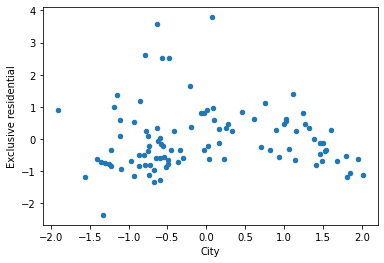

In [16]:
# 14-14 新しい列の散布図を描画する

#都市の発展度合いと住環境の良さ
col = ['City', 'Exclusive residential']
# 列名の変更
new_df.columns = col
# 散布図
new_df.plot(kind='scatter', x='City', y='Exclusive residential')  

### 14.4.2 最適な列の個数（寄与率）

In [17]:
# 14-15 新規の軸をすべて用意する

model = PCA(whiten=True)

# 学習と新規軸へのデータの当てはめを一括で行う
tmp = model.fit_transform(sc_df)
tmp.shape

(100, 15)

In [18]:
# 14-16 寄与率を表示する
model.explained_variance_ratio_

array([0.41102789, 0.14484698, 0.10192698, 0.06448954, 0.06233684,
       0.05810331, 0.04843711, 0.02885228, 0.02142431, 0.01831962,
       0.01572944, 0.01068611, 0.00918466, 0.00277548, 0.00185945])

<AxesSubplot:>

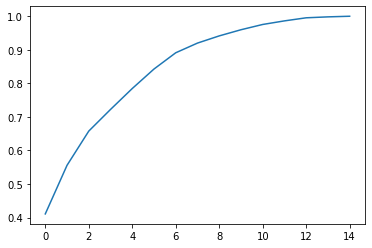

In [19]:
# 14-17 累積寄与率
# 寄与率のデータ集合
ratio = model.explained_variance_ratio_
# 第N列までの累積寄与率を格納するリスト
array = []  
for i in range(len(ratio)):
    # 累積寄与率の計算
    ruiseki = sum(ratio[0:(i+1)])
    # 累積寄与率の格納
    array.append(ruiseki)

# 第N列の累積寄与率を折れ線グラフ化
pd.Series(array).plot(kind='line')


In [28]:
# 14-18 情報量のしきい値を設定して必要な列の数を求める

# 累積寄与率のしきい値
threshold = 0.8  
for i in range(len(array)):
# 第(i + 1)列の累積寄与率がthresholdより大きいかチェック
    if array[i] >= threshold:
        print(i + 1)
        break

6


In [29]:
# 14-19 新規の列を6つに設定してモデルを学習させる

# もとデータの全情報の80%を賄うために、新規の列を6つに設定する
model = PCA(n_components=6, whiten=True)

model.fit(sc_df)

# 元データを新規の列（6列）に当てはめる
new = model.transform(sc_df)

In [30]:
# 14-20 6列のデータをCSVファイルに保存する

# 主成分分析の結果をデータフレームに変換
col = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
new_df2 = pd.DataFrame(new, columns=col)

# データフレームをcsvファイルとして保存
new_df2.to_csv('../models/boston_pca.csv', index=False)

## 14.6 練習問題

In [31]:
# データの読み込みと前処理

df = pd.read_csv('../support/datafiles/cinema.csv')
df = df.drop('cinema_id', axis=1)
# 欠損値補完
df = df.fillna(df.mean())
# 可能なら外れ値の確認もするが今回は割愛

In [32]:
# データの標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns=df.columns)

In [33]:
# 累積寄与率を調べる
from sklearn.decomposition import PCA

model = PCA(whiten=True)
model.fit(sc_df)

total = []
for i in model.explained_variance_ratio_:
    if len(total) == 0:
        total.append(i)
    else:
        tmp = total[-1] + i
        total.append(tmp)
total

[0.5401206784462207,
 0.7261760786703707,
 0.8624874337165251,
 0.9677581622696745,
 1.0]

In [34]:
# 主成分負荷量を調べる
model = PCA( n_components=3, whiten=True)
model.fit(sc_df)
new = pd.DataFrame(
    model.transform(sc_df), columns=['pc1', 'pc2', 'pc3']
)
new_df = pd.concat([new, sc_df], axis=1)
cor_df = new_df.corr()
cor_df.loc['pc1':'pc3', 'SNS1':]

,SNS1,SNS2,actor,original,sales
pc1,0.736368,0.598555,0.837999,0.469117,0.936901
pc2,-0.050756,-0.534089,-0.037073,0.800559,0.013415
pc3,-0.531509,0.536704,-0.017275,0.324773,-0.072303
